## **Sales per sale consultants - Performance:**

### **Dependencies:**

In [2]:
import copy 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### **Get data and display first few and last few records:**

In [3]:
df = pd.read_excel('Sales Force Data.xlsx')
df['fCreditPuer'] = df['fCreditPure'] 
df['fSalesPuer'] = df['fSalesPure'] 
df.drop(columns = ['fCreditPure','fSalesPure'],axis=1,inplace=True)
df.head()

,iPersonID,dtPeriod,iDistID,iManID,fSales,fCredit,fCreditPuer,fSalesPuer
0,40005,2017-01-01,40005,40005,0.0,0.0,NaN,1514.0
1,40008,2017-01-01,40008,40008,1879.0,0.0,NaN,NaN
2,40011,2017-01-01,40011,40011,4377.0,0.0,NaN,420.0
3,45898,2017-01-01,40005,40200,0.0,0.0,NaN,362.0
4,45921,2017-01-01,40005,40200,0.0,0.0,NaN,427.0


In [4]:
df.tail()

,iPersonID,dtPeriod,iDistID,iManID,fSales,fCredit,fCreditPuer,fSalesPuer
721273,83347,2020-01-03,83347,83347,971314.0,378560.0,191630.0,319985.0
721274,83348,2020-01-03,83348,83348,84560.0,83650.0,87770.0,95245.0
721275,83372,2020-01-03,74783,77385,1310.0,0.0,NaN,115.0
721276,83379,2020-01-03,40030,40030,2400.0,0.0,0.0,3600.0
721277,83398,2020-01-03,40333,127189,0.0,0.0,0.0,1620.0


### **Zero-impute all missing values on sales and records:**

In [5]:
df.fillna(0, inplace=True)
df.head()

,iPersonID,dtPeriod,iDistID,iManID,fSales,fCredit,fCreditPuer,fSalesPuer
0,40005,2017-01-01,40005,40005,0.0,0.0,0.0,1514.0
1,40008,2017-01-01,40008,40008,1879.0,0.0,0.0,0.0
2,40011,2017-01-01,40011,40011,4377.0,0.0,0.0,420.0
3,45898,2017-01-01,40005,40200,0.0,0.0,0.0,362.0
4,45921,2017-01-01,40005,40200,0.0,0.0,0.0,427.0


### **Record attributes, number of records and number of consultants:**

In [6]:
print("The attributes of our data frames:")
for k in df.keys():
    print(k)
print('\n')
Number_of_Records = len(df)
Number_of_consultants = len(df['iPersonID'].unique())
print("The number of records is: {}".format(Number_of_Records))
print("The number of consultants is: {}".format(Number_of_consultants))

The attributes of our data frames:
iPersonID
dtPeriod
iDistID
iManID
fSales
fCredit
fCreditPuer
fSalesPuer


The number of records is: 721278
The number of consultants is: 112489


### **Aggregate Sales and Returns for Home category:**

In [7]:
df_home = copy.deepcopy(df)
df_home['Home_net_Sales'] = df_home['fSales'] - df_home['fCredit']
df_home.drop(['fSales','fCredit','fSalesPuer','fCreditPuer'], axis=1, inplace=True)
df_home.head()

,iPersonID,dtPeriod,iDistID,iManID,Home_net_Sales
0,40005,2017-01-01,40005,40005,0.0
1,40008,2017-01-01,40008,40008,1879.0
2,40011,2017-01-01,40011,40011,4377.0
3,45898,2017-01-01,40005,40200,0.0
4,45921,2017-01-01,40005,40200,0.0


### **Aggregate Sales and Returns for Puer category:**

In [8]:
df_Puer = copy.deepcopy(df)
df_Puer['Puer_net_Sales'] = df_Puer['fSalesPuer'] - df_Puer['fCreditPuer']
df_Puer.drop(['fSales','fCredit','fSalesPuer','fCreditPuer'], axis=1, inplace=True)
df_Puer.head()

,iPersonID,dtPeriod,iDistID,iManID,Puer_net_Sales
0,40005,2017-01-01,40005,40005,1514.0
1,40008,2017-01-01,40008,40008,0.0
2,40011,2017-01-01,40011,40011,420.0
3,45898,2017-01-01,40005,40200,362.0
4,45921,2017-01-01,40005,40200,427.0


### **Aggregate Sales and Returns for both categories:**

In [9]:
df_All_Categories = copy.deepcopy(df)
df_All_Categories['Total_net_Sales'] = df_All_Categories['fSales'] - df_All_Categories['fCredit'] + df_All_Categories['fSalesPuer'] - df_All_Categories['fCreditPuer']
df_All_Categories.drop(['fSales','fCredit','fSalesPuer','fCreditPuer'], axis=1, inplace=True)
df_All_Categories.head()

,iPersonID,dtPeriod,iDistID,iManID,Total_net_Sales
0,40005,2017-01-01,40005,40005,1514.0
1,40008,2017-01-01,40008,40008,1879.0
2,40011,2017-01-01,40011,40011,4797.0
3,45898,2017-01-01,40005,40200,362.0
4,45921,2017-01-01,40005,40200,427.0


### **Sales consultant performance on Home products:**

In [10]:
consultants = df_home.groupby('iPersonID')
records_per_consultants = {}
sales_per_consultants = {}
for key in consultants.groups.keys():
    records_per_consultants.update({key:len(consultants.get_group(key))})
    sales_per_consultants.update({key:consultants.get_group(key)['Home_net_Sales'].sum()})

#### **In terms of records:**

The percentage of sales consultants with less than 10 records: 0.7941487612122075%
The percentage of sales consultants with less than 15 records: 0.8834374916658517%


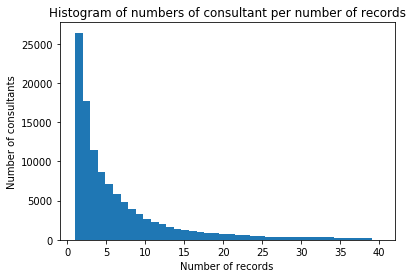

In [11]:
plt.hist(list(records_per_consultants.values()),bins=40)
plt.title('Histogram of numbers of consultant per number of records')
plt.xlabel('Number of records')
plt.ylabel('Number of consultants')
prop_10 = len([i for i in list(records_per_consultants.values()) if i < 10])/len(list(records_per_consultants.values()))
prop_15 = len([i for i in list(records_per_consultants.values()) if i < 15])/len(list(records_per_consultants.values()))
print("The percentage of sales consultants with less than 10 records: {}%".format(prop_10))
print("The percentage of sales consultants with less than 15 records: {}%".format(prop_15))

In the 3 years span, the number of records per sales consultants vary from 1 to 40 with 88% with less than 15 and 10% with less than 10 record: Is it because they recently joined, or they have left (some only in 2017, some only in 2019, etc.) or because of little sales???

NB: The more the records, the more the sales values

Text(0, 0.5, 'Number of consultants')

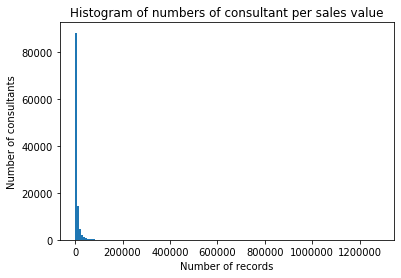

In [45]:
plt.hist(list(sales_per_consultants.values()),bins=150)
plt.title('Histogram of numbers of consultant per sales value')
plt.xlabel('Number of records')
plt.ylabel('Number of consultants')

#### **In terms of sales value:**

The sales consultant with the most sales for home products is ID:83347.
The number of records is 39 and the sales value of R 2715621.0.

The sales consultant with the least sales for home products is ID:275952.
The number of records is 1 and the sales value of R -1240.0.

The total sales value for home products: R 1054542118.0080034



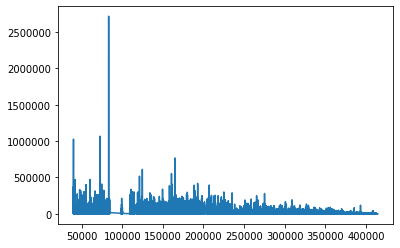

In [18]:
List = list(sales_per_consultants.keys())
List1 = list(sales_per_consultants.values())
plt.plot(List,List1)
Most_sales = max(List1)
Most_sales_idx = List1.index(max(List1))
Least_sales = min(List1)
Least_sales_idx = List1.index(min(List1))
print('The sales consultant with the most sales for home products is ID:{}.'.format(List[Most_sales_idx]))
print('The number of records is {} and the sales value of R {}.\n'.format(len(consultants.get_group(List[Most_sales_idx])),Most_sales))

print('The sales consultant with the least sales for home products is ID:{}.'.format(List[Least_sales_idx]))
print('The number of records is {} and the sales value of R {}.\n'.format(len(consultants.get_group(List[Least_sales_idx])),Least_sales))

print('The total sales value for home products: R {}\n'.format(sum(list(sales_per_consultants.values()))))

#### **More sales stats:**

In [43]:
pd.Series(list(sales_per_consultants.values())).describe()

count    1.124890e+05
mean     6.143482e+03
std      1.486357e+04
min     -1.390000e+03
25%      7.120000e+02
50%      2.200000e+03
75%      6.105000e+03
max      1.282688e+06
dtype: float64

### **Sales consultant performance on Puer products:**

In [40]:
consultants = df_Puer.groupby('iPersonID')
records_per_consultants = {}
sales_per_consultants = {}
for key in consultants.groups.keys():
    records_per_consultants.update({key:len(consultants.get_group(key))})
    sales_per_consultants.update({key:consultants.get_group(key)['Puer_net_Sales'].sum()})

#### **In terms of records: Same as previous**

The percentage of sales consultants with less than 10 records: 0.7941487612122075%
The percentage of sales consultants with less than 15 records: 0.8834374916658517%


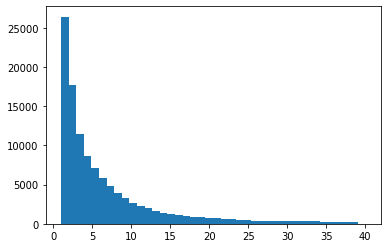

In [41]:
plt.hist(list(records_per_consultants.values()),bins=40)
prop_10 = len([i for i in list(records_per_consultants.values()) if i < 10])/len(list(records_per_consultants.values()))
prop_15 = len([i for i in list(records_per_consultants.values()) if i < 15])/len(list(records_per_consultants.values()))
print("The percentage of sales consultants with less than 10 records: {}%".format(prop_10))
print("The percentage of sales consultants with less than 15 records: {}%".format(prop_15))

In the 3 years span, the number of records per sales consultants vary from 1 to 40 with X% with less than 15 and X with less than 10 record: Is it because they recently joined, or they have left (some only in 2017, some only in 2019, etc.) or because of little sales???

NB: The more the records, the more the sales values

Text(0, 0.5, 'Number of consultants')

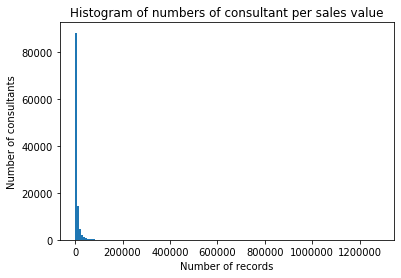

In [46]:
plt.hist(list(sales_per_consultants.values()),bins=150)
plt.title('Histogram of numbers of consultant per sales value')
plt.xlabel('Number of records')
plt.ylabel('Number of consultants')

#### **In terms of sales value:**

The sales consultant with the most sales for home products is ID:83347.
The number of records is 39 and the sales value of R 3998309.0.

The sales consultant with the least sales for home products is ID:359539.
The number of records is 2 and the sales value of R -2630.0.

The total sales value for home products: R 1745616318.0379977



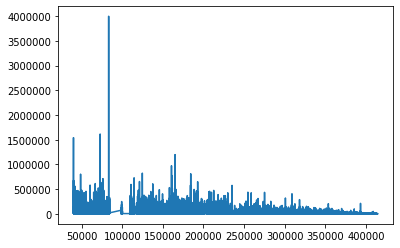

In [39]:
List = list(sales_per_consultants.keys())
List2 = list(sales_per_consultants.values())
plt.plot(List,List2)
Most_sales = max(List2)
Most_sales_idx = List2.index(max(List2))
Least_sales = min(List2)
Least_sales_idx = List2.index(min(List2))
print('The sales consultant with the most sales for home products is ID:{}.'.format(List[Most_sales_idx]))
print('The number of records is {} and the sales value of R {}.\n'.format(len(consultants.get_group(List[Most_sales_idx])),Most_sales))

print('The sales consultant with the least sales for home products is ID:{}.'.format(List[Least_sales_idx]))
print('The number of records is {} and the sales value of R {}.\n'.format(len(consultants.get_group(List[Least_sales_idx])),Least_sales))

print('The total sales value for home products: R {}\n'.format(sum(list(sales_per_consultants.values()))))

#### **More sales stats:**

In [44]:
pd.Series(list(sales_per_consultants.values())).describe()

count    1.124890e+05
mean     6.143482e+03
std      1.486357e+04
min     -1.390000e+03
25%      7.120000e+02
50%      2.200000e+03
75%      6.105000e+03
max      1.282688e+06
dtype: float64

### **Sales consultant performance on all products:**

In [25]:
consultants = df_All_Categories.groupby('iPersonID')
records_per_consultants = {}
sales_per_consultants = {}
for key in consultants.groups.keys():
    records_per_consultants.update({key:len(consultants.get_group(key))})
    sales_per_consultants.update({key:consultants.get_group(key)['Total_net_Sales'].sum()})

#### **In terms of records:**

The percentage of sales consultants with less than 10 records: 0.7941487612122075%
The percentage of sales consultants with less than 15 records: 0.8834374916658517%


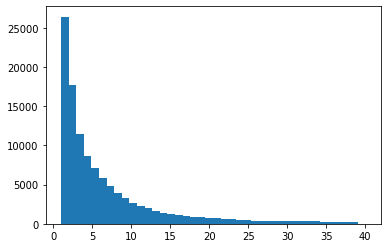

In [28]:
plt.hist(list(records_per_consultants.values()),bins=40)
prop_10 = len([i for i in list(records_per_consultants.values()) if i < 10])/len(list(records_per_consultants.values()))
prop_15 = len([i for i in list(records_per_consultants.values()) if i < 15])/len(list(records_per_consultants.values()))
print("The percentage of sales consultants with less than 10 records: {}%".format(prop_10))
print("The percentage of sales consultants with less than 15 records: {}%".format(prop_15))

In the 3 years span, the number of records per sales consultants vary from 1 to 40 with X% with less than 15 and X with less than 10 record: Is it because they recently joined, or they have left (some only in 2017, some only in 2019, etc.) or because of little sales???

NB: The more the records, the more the sales values

Text(0, 0.5, 'Number of consultants')

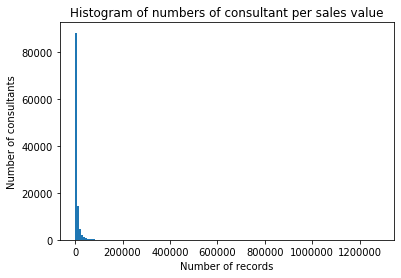

In [47]:
plt.hist(list(sales_per_consultants.values()),bins=150)
plt.title('Histogram of numbers of consultant per sales value')
plt.xlabel('Number of records')
plt.ylabel('Number of consultants')

#### **In terms of sales:**

The sales consultant with the most sales for home products is ID:83347.
The number of records is 39 and the sales value of R 3998309.0.

The sales consultant with the least sales for home products is ID:359539.
The number of records is 2 and the sales value of R -2630.0.

The total sales value for home products: R 1745616318.0379977



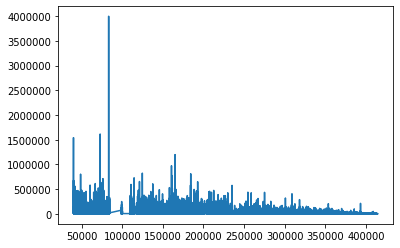

In [32]:
List = list(sales_per_consultants.keys())
List3 = list(sales_per_consultants.values())
plt.plot(List,List3)
Most_sales = max(List3)
Most_sales_idx = List3.index(max(List3))
Least_sales = min(List3)
Least_sales_idx = List3.index(min(List3))
print('The sales consultant with the most sales for home products is ID:{}.'.format(List[Most_sales_idx]))
print('The number of records is {} and the sales value of R {}.\n'.format(len(consultants.get_group(List[Most_sales_idx])),Most_sales))

print('The sales consultant with the least sales for home products is ID:{}.'.format(List[Least_sales_idx]))
print('The number of records is {} and the sales value of R {}.\n'.format(len(consultants.get_group(List[Least_sales_idx])),Least_sales))

print('The total sales value for home products: R {}\n'.format(sum(list(sales_per_consultants.values()))))

#### **More sales stats:**

In [33]:
pd.Series(list(sales_per_consultants.values())).describe()

count    1.124890e+05
mean     1.551811e+04
std      3.380726e+04
min     -2.630000e+03
25%      2.250000e+03
50%      5.985000e+03
75%      1.603500e+04
max      3.998309e+06
dtype: float64

### **Further investigation:**

**1) The sales value distribution is similar showing the the sales performance is consistent across categories --> How statistically significant is that claim can be tested.** <br/>

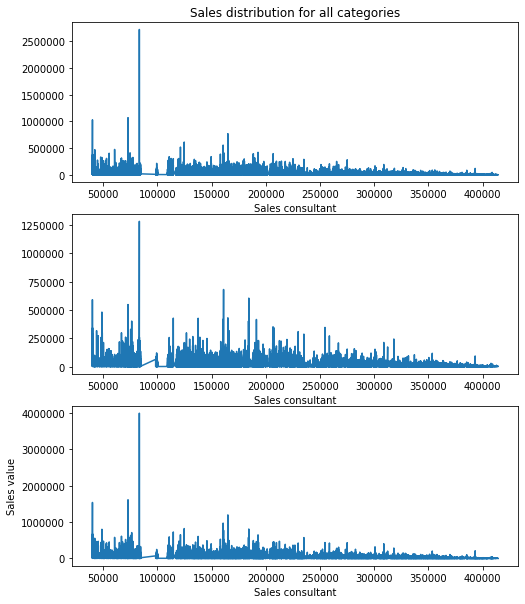

In [38]:
plt.figure(figsize=(8,10))
plt.subplot(311)
plt.plot(List,List1)
plt.title('Sales distribution for all categories')
plt.xlabel('Sales consultant')
plt.subplot(312)
plt.plot(List,List2)
plt.xlabel('Sales consultant')
plt.subplot(313)
plt.plot(List,List3)
plt.xlabel('Sales consultant')
plt.ylabel('Sales value')
plt.show()

**2) The manager’s performance (record and sales).** <br/>
**3) The distributer’s performance (record and sales).** <br/>
**4) Is their consistant increased sales performance when sales consultantrs are also  distributors and managers?** <br/>
**5) Make use a random forest regressor to predict sales (or at least ranges) given all this attributes (sales consultant, distributor, manager, month of the year).**